In [1]:
import os

os.environ["KERAS_BACKEND"] = "jax"


import numpy as np
import matplotlib.pyplot as plt

import jax.numpy as jnp
import jax.random as jax_random
import pandas as pd

import keras
from keras import models
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics 
from keras import ops

In [2]:
plt.set_loglevel("info")

In [3]:
import torchvision
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

to_numpy_array = lambda img: np.array(img, dtype=np.float32) / 255.0

mnist_data_train = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=to_numpy_array,
)
mnist_data_test = torchvision.datasets.MNIST(
    "./data",
    train=False,
    download=True,
    transform=to_numpy_array,
)
x_example, y_example = mnist_data_train[0]

In [4]:
B = 32
mnist_train_loader = DataLoader(mnist_data_train, batch_size=B, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_test, batch_size=B)

In [5]:
#How many values are in the input? We use this to help determine the size of subsequent layers
D = 28*28 #28 * 28 images 
#Hidden layer size
n = 256 
#How many channels are in the input?
C = 1
#How many classes are there?
classes = 10
x_shape = (28, 28)

#Create our regular model 
model_regular =  models.Sequential(
    [
        layers.Input(shape=x_shape),
        layers.Flatten(),
        layers.Dense(n, activation="tanh"),
        layers.Dense(n, activation="tanh"),
        layers.Dense(n, activation="tanh"),
        layers.Dense(classes, activation="softmax"),
    ]
)

model_regular.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)
fc_results = model_regular.fit(mnist_train_loader, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.7596 - sparse_categorical_accuracy: 0.7964
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3010 - sparse_categorical_accuracy: 0.9143
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2528 - sparse_categorical_accuracy: 0.9284
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2245 - sparse_categorical_accuracy: 0.9357
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1915 - sparse_categorical_accuracy: 0.9458
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1674 - sparse_categorical_accuracy: 0.9522
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1503 - sparse_categorical_accuracy: 0.9571
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1370 - sparse_categorical_accuracy: 0.9614
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1246 - sparse_categorical_accuracy: 0.9643
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━

In [6]:
#Create our regular model 
h2_layer = layers.Dense(n, activation="tanh")
model_shared =  models.Sequential(
    [
        layers.Input(shape=x_shape),
        layers.Flatten(),
        layers.Dense(n, activation="tanh"),
        h2_layer,
        h2_layer,
        layers.Dense(classes, activation="softmax"),
    ]
)

model_shared.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)
fc_shared_result = model_shared.fit(mnist_train_loader, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7725 - sparse_categorical_accuracy: 0.7939
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2958 - sparse_categorical_accuracy: 0.9147
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2523 - sparse_categorical_accuracy: 0.9266
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2161 - sparse_categorical_accuracy: 0.9379
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1912 - sparse_categorical_accuracy: 0.9449
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1677 - sparse_categorical_accuracy: 0.9517
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1528 - sparse_categorical_accuracy: 0.9561
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1358 - sparse_categorical_accuracy: 0.9614
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9645
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━

<Axes: xlabel='epochs', ylabel='Accuracy'>

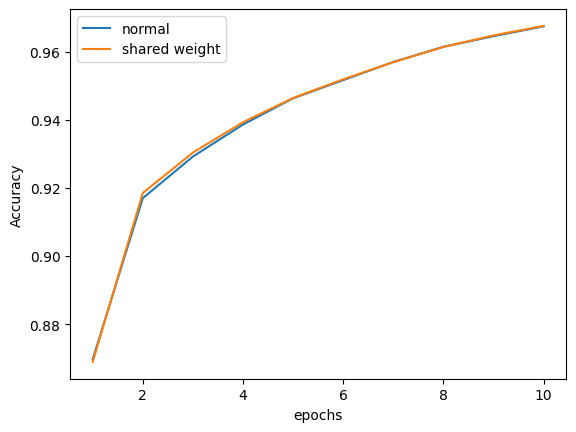

In [7]:
pd.DataFrame(
    {
        "epochs": np.arange(1, 11, 1),
        "normal": fc_results.history[
            "sparse_categorical_accuracy"
        ],
        "shared weight": fc_shared_result.history[
            "sparse_categorical_accuracy"
        ],
    }
).set_index("epochs").plot(ylabel="Accuracy")

In [8]:
zip_file_url = "https://download.pytorch.org/tutorial/data.zip"

import requests, zipfile, io
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#Zip file is organized as data/names/[LANG].txt , where [LANG] is a specific language

In [9]:
namge_language_data = {}

#We will use some code to remove UNICODE tokens to make life easy for us processing wise
#e.g., convert something like "Ślusàrski" to Slusarski
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
alphabet = {}
for i in range(n_letters):
    alphabet[all_letters[i]] = i
    
# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

#Loop through every language, open the zip file entry, and read all the lines from the text file. 
for zip_path in z.namelist():
    if "data/names/" in zip_path and zip_path.endswith(".txt"):
        lang = zip_path[len("data/names/"):-len(".txt")]
        with z.open(zip_path) as myfile:
            lang_names = [unicodeToAscii(line).lower() for line in str(myfile.read(), encoding='utf-8').strip().split("\n")]
            namge_language_data[lang] = lang_names
        print(lang, ": ", len(lang_names)) #Print out the name of each language too. 

Arabic :  2000
Chinese :  268
Czech :  519
Dutch :  297
English :  3668
French :  277
German :  724
Greek :  203
Irish :  232
Italian :  709
Japanese :  991
Korean :  94
Polish :  139
Portuguese :  74
Russian :  9408
Scottish :  100
Spanish :  298
Vietnamese :  73


In [10]:
class LanguageNameDataset(Dataset):
    
    def __init__(self, lang_name_dict, vocabulary):
        self.label_names = [x for x in lang_name_dict.keys()]
        self.data = []
        self.labels = []
        self.vocabulary = vocabulary
        for y, language in enumerate(self.label_names):
            for sample in lang_name_dict[language]:
                self.data.append(sample)
                self.labels.append(y)
        
    def __len__(self):
        return len(self.data)
    
    def string2InputVec(self, input_string):
        """
        This method will convert any input string into a vector of long values, according to the vocabulary used by this object. 
        input_string: the string to convert to a tensor
        """
        T = len(input_string) #How many characters long is the string?
        
        #Create a new tensor to store the result in
        name_vec = np.zeros((T), dtype=np.long)
        #iterate through the string and place the appropriate values into the tensor
        for pos, character in enumerate(input_string):
            name_vec[pos] = self.vocabulary[character]
            
        return name_vec
    
    def __getitem__(self, idx):
        name = self.data[idx]
        label = self.labels[idx]
        
        #Conver the correct class label into a tensor for PyTorch
        label_vec = np.array([label], dtype=np.long)
        
        return self.string2InputVec(name), label

In [11]:
import torch

dataset = LanguageNameDataset(namge_language_data, alphabet)

train_data, test_data = torch.utils.data.random_split(dataset, (len(dataset)-300, 300))
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [12]:
input_sequence = np.array([0, 1, 1, 0, 2], dtype=np.long)
embeding_layer = layers.Embedding(3, 2)
x_seq = embeding_layer(input_sequence)
print(input_sequence.shape, x_seq.shape)

(5,) (5, 2)


In [13]:
D = 64
vocab_size = len(all_letters)
hidden_nodes = 256
classes = len(dataset.label_names)

In [14]:
# first_rnn = nn.Sequential(
#   nn.Embedding(vocab_size, D), #(B, T) -> (B, T, D)
#   nn.RNN(D, hidden_nodes, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
#   #the tanh activation is built into the RNN object, so we don't need to do it here
#   LastTimeStep(), #We need to take the RNN output and reduce it to one item, (B, D)
#   nn.Linear(hidden_nodes, classes), #(B, D) -> (B, classes)
# )

In [15]:
class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.state_size = units

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = ops.matmul(inputs, self.kernel)
        output = h + ops.matmul(prev_output, self.recurrent_kernel)
        return output, [output]

first_rnn = models.Sequential([
  layers.Embedding(vocab_size, D),
  layers.RNN(cell=[MinimalRNNCell(hidden_nodes)],return_sequences=False, return_state=False),
  layers.Dense( classes, activation="softmax"), #(B, D) -> (B, classes)
])

In [16]:
first_rnn.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)
first_rnn_result = first_rnn.fit(train_loader, epochs=10)

Epoch 1/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 13s 629us/step - loss: 1.5083 - sparse_categorical_accuracy: 0.5726
Epoch 2/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 9s 453us/step - loss: 1.0686 - sparse_categorical_accuracy: 0.6753
Epoch 3/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 9s 447us/step - loss: 1.0292 - sparse_categorical_accuracy: 0.6837
Epoch 4/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 9s 458us/step - loss: 1.0231 - sparse_categorical_accuracy: 0.6819
Epoch 5/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 9s 448us/step - loss: 1.0049 - sparse_categorical_accuracy: 0.6849
Epoch 6/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 9s 448us/step - loss: 0.9937 - sparse_categorical_accuracy: 0.6908
Epoch 7/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 9s 447us/step - loss: 1.0014 - sparse_categorical_accuracy: 0.6861
Epoch 8/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 9s 448us/step - loss: 1.0081 - sparse_categorical_accuracy: 0.6828
Epoch 9/10
19774/19774 ━━━━━━━━━━━━━━━━━━━━ 9s 452us/step - loss: 1.0130 - sparse_categorical_accuracy: 0.6825


<Axes: >

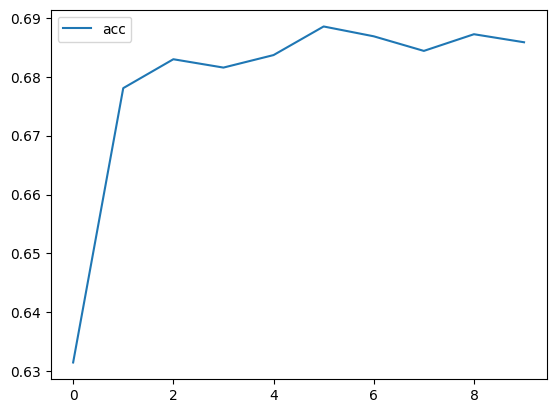

In [17]:
pd.DataFrame({
    "acc": first_rnn_result.history["sparse_categorical_accuracy"],
}).plot()